# **Exploratory Data Analysis**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectFromModel

data = pd.read_csv('data_final_with_outlier (1).csv')

In [ ]:
print(f"Dataset shape: {data.shape}")
print("\nFirst 5 rows:")
display(data.head())




Dataset shape: (1994, 43)

First 5 rows:


,racepctblack,racePctWhite,racePctAsian,pctUrban,pctWFarmSelf,pctWInvInc,pctWPubAsst,pctWRetire,blackPerCap,indianPerCap,...,NumStreet,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,0.02,0.90,0.12,1.0,0.34,0.60,0.15,0.43,0.32,0.27,...,0.0,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,0.20
1,0.12,0.74,0.45,1.0,0.11,0.45,0.29,0.39,0.33,0.16,...,0.0,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00,0.67
2,0.49,0.56,0.17,0.0,0.19,0.39,0.40,0.84,0.27,0.07,...,0.0,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00,0.43
3,1.00,0.08,0.12,1.0,0.21,0.43,0.20,0.82,0.39,0.16,...,0.0,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00,0.12
4,0.02,0.95,0.09,0.9,0.16,0.68,0.11,0.71,0.28,0.00,...,0.0,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00,0.03


In [ ]:
print("\nData summary:")
display(data.describe())


Data summary:


,racepctblack,racePctWhite,racePctAsian,pctUrban,pctWFarmSelf,pctWInvInc,pctWPubAsst,pctWRetire,blackPerCap,indianPerCap,...,NumStreet,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,0.179629,0.753716,0.153681,0.696269,0.291570,0.495687,0.317778,0.479248,0.291098,0.203506,...,0.022778,0.608892,0.535050,0.626424,0.651530,0.065231,0.232854,0.161685,0.094052,0.237979
std,0.253442,0.244039,0.208877,0.444811,0.204108,0.178071,0.222137,0.167564,0.171593,0.164775,...,0.100400,0.204329,0.181352,0.200521,0.198221,0.109459,0.203092,0.229055,0.240328,0.232985
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.020000,0.630000,0.040000,0.000000,0.160000,0.370000,0.142500,0.360000,0.172500,0.110000,...,0.000000,0.470000,0.420000,0.520000,0.560000,0.020000,0.100000,0.020000,0.000000,0.070000
50%,0.060000,0.850000,0.070000,1.000000,0.230000,0.480000,0.260000,0.470000,0.250000,0.170000,...,0.000000,0.630000,0.540000,0.670000,0.700000,0.040000,0.170000,0.070000,0.000000,0.150000
75%,0.230000,0.940000,0.170000,1.000000,0.370000,0.620000,0.440000,0.580000,0.380000,0.250000,...,0.000000,0.777500,0.660000,0.770000,0.790000,0.070000,0.280000,0.190000,0.000000,0.330000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
print("\nMissing values:")
display(data.isna().sum())


Missing values:


,0
racepctblack,0
racePctWhite,0
racePctAsian,0
pctUrban,0
pctWFarmSelf,0
pctWInvInc,0
pctWPubAsst,0
pctWRetire,0
blackPerCap,0
indianPerCap,0


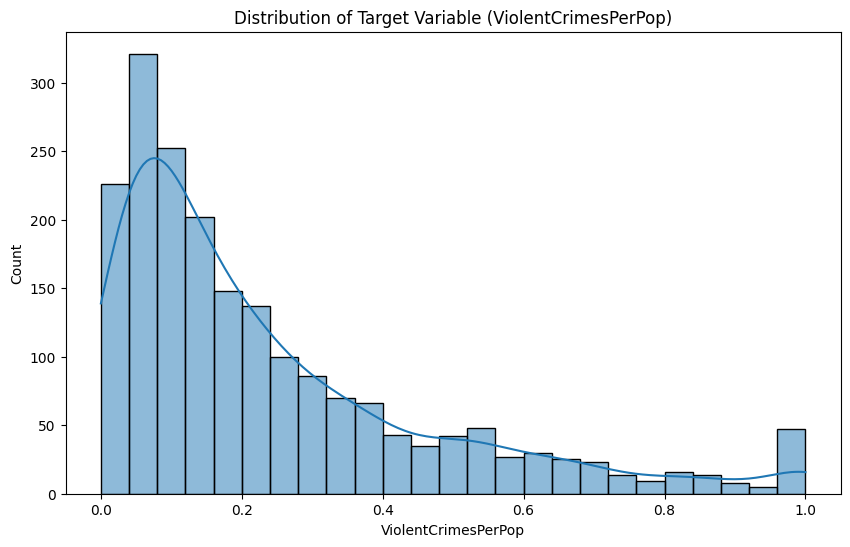

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['ViolentCrimesPerPop'], kde=True)
plt.title('Distribution of Target Variable (ViolentCrimesPerPop)')
plt.show()

. Train_

# **Train-Test** **Splitting:**

In [ ]:
X = data.drop(columns=['ViolentCrimesPerPop'])
y = data['ViolentCrimesPerPop']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Feature Selection**

Selected 21 features:


,Selected Features
0,racepctblack
1,racePctWhite
2,pctWFarmSelf
3,pctWInvInc
4,pctWPubAsst
5,AsianPerCap
6,HispPerCap
7,PctPopUnderPov
8,PctUnemployed
9,PctEmplProfServ


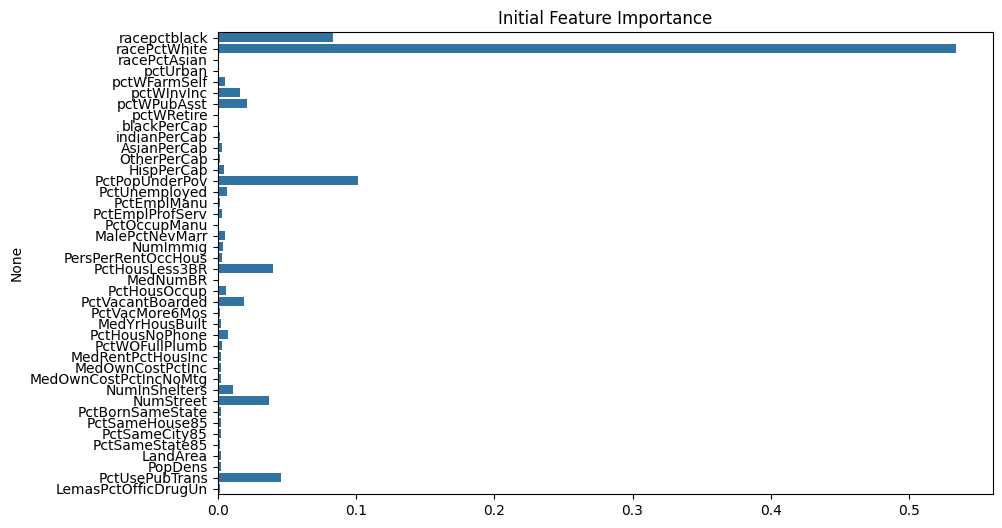

In [ ]:
selector_rf = RandomForestRegressor(n_estimators=100, max_depth=5, min_samples_leaf=5, random_state=42)
selector_rf.fit(X_train, y_train)

selector = SelectFromModel(selector_rf, threshold='median')
selector.fit(X_train, y_train)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)
selected_features = X.columns[selector.get_support()]

print(f"Selected {len(selected_features)} features:")
display(pd.DataFrame(selected_features, columns=['Selected Features']))

plt.figure(figsize=(10, 6))
sns.barplot(x=selector_rf.feature_importances_, y=X.columns)
plt.title('Initial Feature Importance')
plt.show()

# **Modeling** **Random** **Forests**

In [ ]:
rf = RandomForestRegressor(
    n_estimators=150,
    max_depth=6,
    min_samples_split=20,
    min_samples_leaf=15,
    max_features=0.4,
    max_samples=0.7,
    random_state=42
)

rf.fit(X_train_selected, y_train)

RandomForestRegressor(max_depth=6, max_features=0.4, max_samples=0.7,
                      min_samples_leaf=15, min_samples_split=20,
                      n_estimators=150, random_state=42)

# **Evaluation:**

In [ ]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    metrics = {
        'Train MSE': mean_squared_error(y_train, y_train_pred),
        'Test MSE': mean_squared_error(y_test, y_test_pred),
        'Train R2': r2_score(y_train, y_train_pred),
        'Test R2': r2_score(y_test, y_test_pred),
        'R2 Gap': r2_score(y_train, y_train_pred) - r2_score(y_test, y_test_pred),
        'MSE Ratio': mean_squared_error(y_test, y_test_pred) / mean_squared_error(y_train, y_train_pred)
    }

    cv_r2 = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    metrics['CV R2 Mean'] = cv_r2.mean()
    metrics['CV R2 Std'] = cv_r2.std()

    return metrics, y_train_pred, y_test_pred

metrics, y_train_pred, y_test_pred = evaluate_model(rf, X_train_selected, y_train, X_test_selected, y_test)

display(pd.DataFrame.from_dict(metrics, orient='index', columns=['Value']))

,Value
Train MSE,0.016569
Test MSE,0.018017
Train R2,0.702204
Test R2,0.623820
R2 Gap,0.078384
MSE Ratio,1.087444
CV R2 Mean,0.624776
CV R2 Std,0.011514


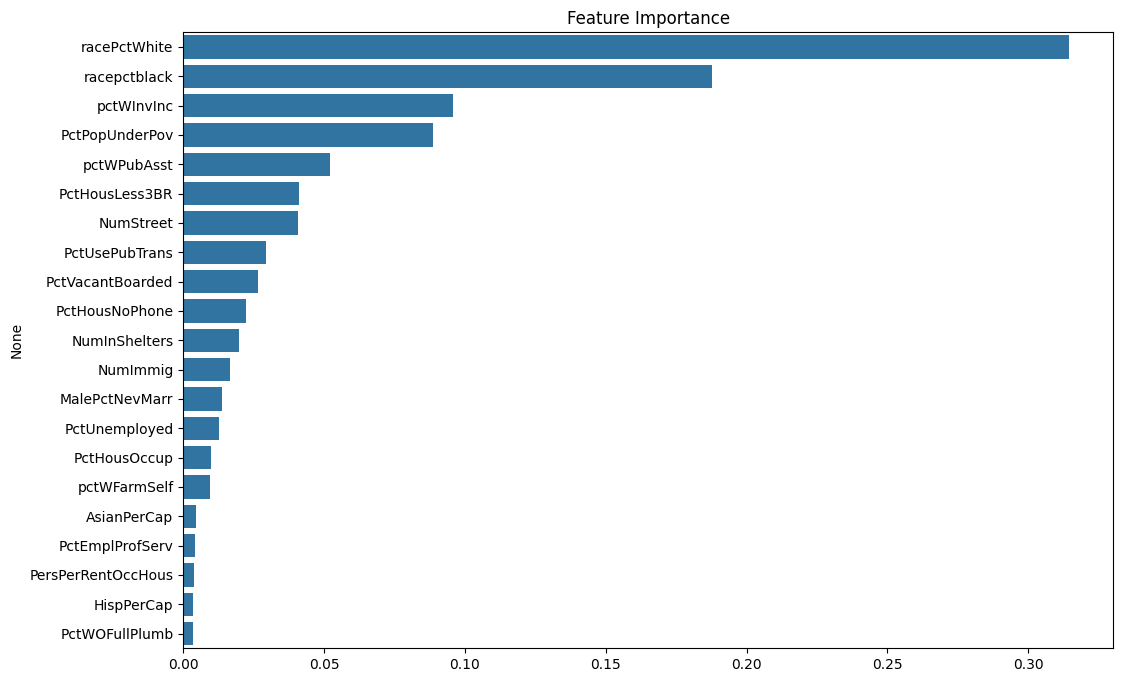

In [ ]:
importances = rf.feature_importances_
feature_imp = pd.Series(importances, index=selected_features).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=feature_imp.values, y=feature_imp.index)
plt.title('Feature Importance')
plt.show()


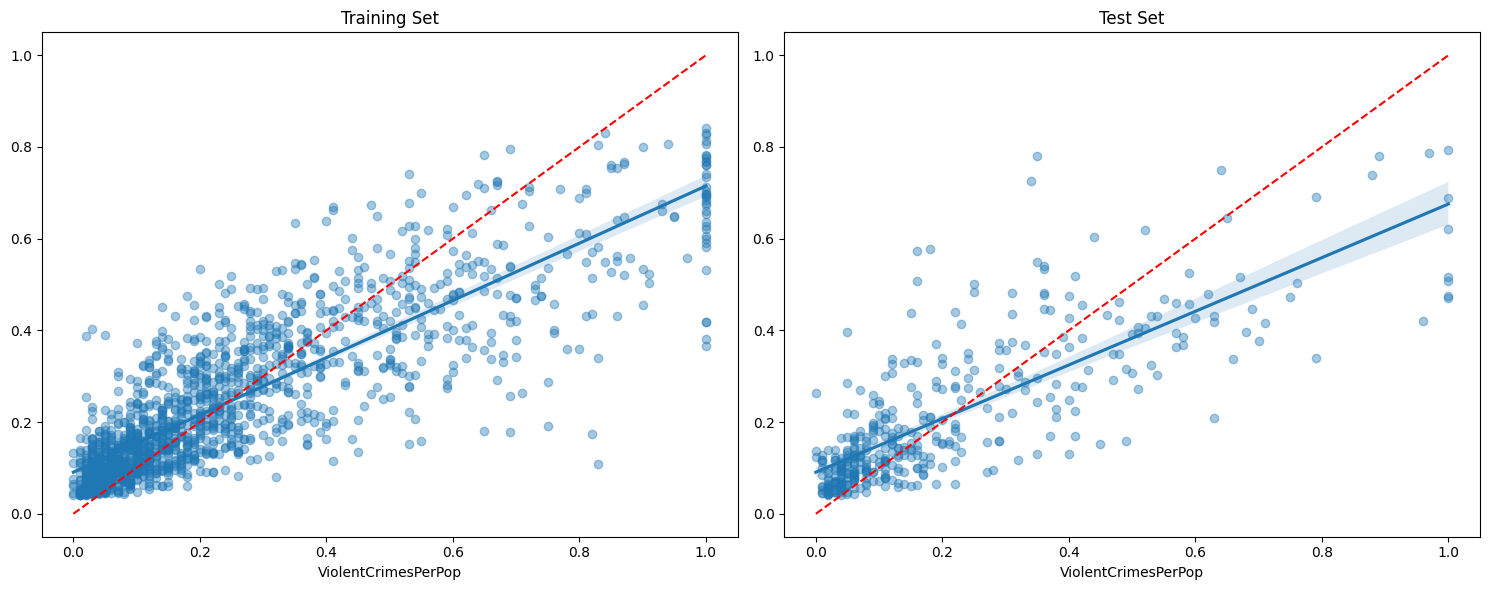

In [ ]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
sns.regplot(x=y_train, y=y_train_pred, ax=ax1, scatter_kws={'alpha':0.4})
ax1.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
ax1.set_title('Training Set')

sns.regplot(x=y_test, y=y_test_pred, ax=ax2, scatter_kws={'alpha':0.4})
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
ax2.set_title('Test Set')

plt.tight_layout()
plt.show()

In [ ]:
print(f"R2 Gap: {metrics['R2 Gap']:.3f}")
print(f"MSE Ratio: {metrics['MSE Ratio']:.2f}")
print(f"CV R2: {metrics['CV R2 Mean']:.3f} ± {metrics['CV R2 Std']:.3f}")

if metrics['R2 Gap'] > 0.15:
    print("Warning: Significant overfitting")
elif metrics['R2 Gap'] > 0.1:
    print("Moderate overfitting")
else:
    print("Good generalization")

print("\nModel Parameters:")
print(f"n_estimators: {rf.n_estimators}")
print(f"max_depth: {rf.max_depth}")
print(f"min_samples_split: {rf.min_samples_split}")
print(f"min_samples_leaf: {rf.min_samples_leaf}")
print(f"max_features: {rf.max_features}")
print(f"max_samples: {rf.max_samples}")

R2 Gap: 0.078
MSE Ratio: 1.09
CV R2: 0.625 ± 0.012
Good generalization

Model Parameters:
n_estimators: 150
max_depth: 6
min_samples_split: 20
min_samples_leaf: 15
max_features: 0.4
max_samples: 0.7
